<a href="https://colab.research.google.com/github/sssuixin/SHAPE-Final-Project/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Import dataset: "Fire From Space: Australia"
Wildfires = pd.read_csv("sample_data/Wildfires.csv")

Wildfires

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight


In [ ]:
# Group by location, understand the pattern between differnt regions. Fire in the region
newLongitude = round(Wildfires.longitude, 0)

newLatitude = round(Wildfires.latitude, 0)
Wildfires.longitude = newLongitude
Wildfires.latitude = newLatitude
Wildfires

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-43.0,148.0,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.0,147.0,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-41.0,145.0,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.0,147.0,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-43.0,148.0,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-33.0,122.0,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-33.0,123.0,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.0,116.0,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.0,116.0,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


In [ ]:
filter3 = (Wildfires.latitude == -43.0)
filter4 = (Wildfires.longitude == 148.0)

Wildfires2 = Wildfires[filter3 & filter4]
Wildfires2

,latitude,longitude,bright_ti4,acq_date,acq_time,bright_ti5,frp,Coordinate,Difference,Group
0,-43.0,148.0,333.6,2019-10-01,336,293.4,4.0,"(148.0, -43.0)",NaN,0
4,-43.0,148.0,334.1,2019-10-01,336,293.5,4.1,"(148.0, -43.0)",0.0,0
4356,-43.0,148.0,337.8,2019-10-02,318,294.9,2.9,"(148.0, -43.0)",1.0,0
61138,-43.0,148.0,311.5,2019-10-14,1418,279.4,1.4,"(148.0, -43.0)",12.0,270
61139,-43.0,148.0,310.5,2019-10-14,1418,279.2,2.6,"(148.0, -43.0)",0.0,270
62436,-43.0,148.0,296.0,2019-10-14,1600,278.9,0.6,"(148.0, -43.0)",0.0,274
62437,-43.0,148.0,305.2,2019-10-14,1600,278.1,1.0,"(148.0, -43.0)",0.0,274
62438,-43.0,148.0,309.6,2019-10-14,1600,278.4,1.2,"(148.0, -43.0)",0.0,274
100067,-43.0,148.0,329.1,2019-10-22,342,297.8,3.5,"(148.0, -43.0)",8.0,470


In [ ]:
Wildfires = Wildfires.drop(columns = ["scan", "track", "satellite", "instrument", "confidence", "version", "daynight"], axis = 0)
Wildfires

,latitude,longitude,bright_ti4,acq_date,acq_time,bright_ti5,frp
0,-43.0,148.0,333.6,2019-10-01,336,293.4,4.0
1,-42.0,147.0,336.2,2019-10-01,336,296.9,3.9
2,-41.0,145.0,327.9,2019-10-01,336,295.3,3.7
3,-42.0,147.0,346.9,2019-10-01,336,294.2,6.2
4,-43.0,148.0,334.1,2019-10-01,336,293.5,4.1
...,...,...,...,...,...,...,...
956252,-33.0,122.0,306.9,2020-01-11,1630,288.6,0.8
956253,-33.0,123.0,299.0,2020-01-11,1630,287.4,0.7
956254,-33.0,116.0,309.7,2020-01-11,1630,291.7,1.0
956255,-33.0,116.0,300.2,2020-01-11,1806,290.2,1.1


In [ ]:
# Add a new column which are the geographic coordinates
Wildfires["Coordinate"] = list(zip(Wildfires["longitude"], Wildfires["latitude"]))
Wildfires["Coordinate"].value_counts()

(152.0, -31.0)    52597
(150.0, -33.0)    40424
(151.0, -33.0)    40287
(150.0, -34.0)    34532
(152.0, -29.0)    23586
                  ...  
(129.0, -32.0)        1
(145.0, -40.0)        1
(117.0, -28.0)        1
(137.0, -31.0)        1
(146.0, -29.0)        1
Name: Coordinate, Length: 636, dtype: int64

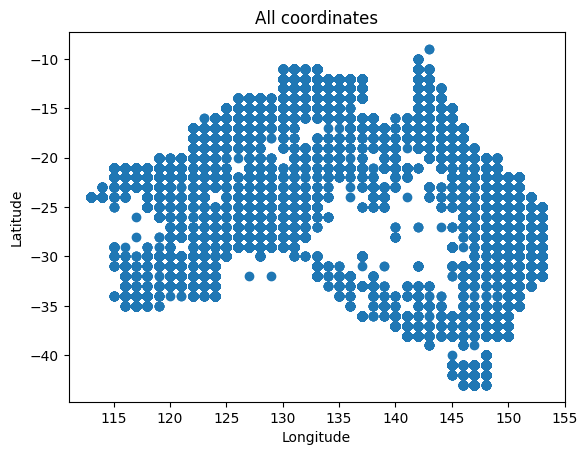

In [ ]:
# Plot coordinates
import matplotlib.pyplot as plt

plt.scatter(Wildfires.longitude, Wildfires.latitude)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
# add a title
plt.title("All coordinates")
plt.show()


In [ ]:
import folium

# Define a map
map = folium.Map()

# Australia's latitude and longitude values
latitude = -30
longitude = 148

# Create Australia's map
aus_map = folium.Map(location = [latitude, longitude], zoom_start = 7, tiles = "Stamen Terrain")

# Graph the first 100 fires(Just demonstration, we have to shorten the scope)
limit = 1000
data = Wildfires.iloc[0:limit, :]

# Instantiate a feature group for the fires in the dataframe
fires = folium.map.FeatureGroup()

# Loop through the first 100 fires and add each to the incidents feature group.
for lat, lng, in zip(Wildfires.latitude, data.longitude):
  fires.add_child(folium.CircleMarker([lat, lng], radius = 7, color = "yellow", fill = True,\
                                          fill_color = "red", fill_opacity = 0.4))

# Add pop-up text (Brightness number) to each marker on the map
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.Coordinate)

for lat, lng, label in zip(latitudes, longitudes, labels):
  folium.Marker([lat, lng], popup = label).add_to(aus_map)

# Add fires to map. And display
aus_map.add_child(fires)

In [ ]:
LongFilter = (Wildfires.longitude >= 148) & (Wildfires.longitude <= 151)
LatFilter = ((Wildfires.latitude == -30) | (Wildfires.latitude == -31)) | (Wildfires.latitude == -32)
# Area = (LongFilter & LatFilter)
# Wildfires[Area]

# Wildfires.loc[LongFilter, ["longitude"]]
# Wildfires.loc[LatFilter, ["latitude"]]

In [ ]:
LongCoord = (Wildfires.longitude == 150)
LatCoord = (Wildfires.latitude == -31)


coordWildfires = Wildfires[LongCoord]
coordWildfires = coordWildfires[LatCoord]
coordWildfires

<ipython-input-175-04f1bd29157b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coordWildfires = coordWildfires[LatCoord]


,latitude,longitude,bright_ti4,acq_date,acq_time,bright_ti5,frp,Coordinate
202,-31.0,150.0,354.0,2019-10-01,342,313.6,10.5,"(150.0, -31.0)"
203,-31.0,150.0,339.6,2019-10-01,342,311.8,2.5,"(150.0, -31.0)"
3524,-31.0,150.0,325.0,2019-10-01,1500,283.6,2.0,"(150.0, -31.0)"
105395,-31.0,150.0,308.7,2019-10-22,1506,285.2,0.4,"(150.0, -31.0)"
387739,-31.0,150.0,346.8,2019-11-28,354,317.0,4.1,"(150.0, -31.0)"
390609,-31.0,150.0,296.9,2019-11-28,1512,286.7,0.3,"(150.0, -31.0)"
390610,-31.0,150.0,304.3,2019-11-28,1512,287.1,0.6,"(150.0, -31.0)"
390611,-31.0,150.0,299.2,2019-11-28,1512,287.1,0.6,"(150.0, -31.0)"
390612,-31.0,150.0,297.8,2019-11-28,1512,286.2,0.6,"(150.0, -31.0)"
390613,-31.0,150.0,306.5,2019-11-28,1512,286.6,0.8,"(150.0, -31.0)"


In [ ]:
coordWildfires.sort_values("acq_date")
coordWildfires["acq_date"] = pd.to_datetime(coordWildfires.acq_date)
coordWildfires["Difference"] = (coordWildfires.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
coordWildfires["Group"] = (coordWildfires.Difference > 1).cumsum()
coordWildfires.groupby("Group").first()
coordWildfires.groupby("Group").size()

# check if possible to predict how long the fire goes on for using the frp on the first day

Group
0    3
1    1
2    8
3    9
4    7
dtype: int64

In [ ]:
Wildfires.sort_values("acq_date")
Wildfires["acq_date"] = pd.to_datetime(Wildfires.acq_date)
Wildfires["Difference"] = (Wildfires.groupby(["longitude", "latitude"]).acq_date.diff().dt.days)
Wildfires["Group"] = (Wildfires.Difference > 1).cumsum()
firstDayWildfires = Wildfires.groupby(["Group", "longitude", "latitude"]).first()
# firstDayIndex
firstDayWildfires["Duration"] = Wildfires.groupby(["Group", "longitude", "latitude"]).size()
# Wildfires.groupby("Group").size()
# Wildfires

# firstDayWildfire = Wildfires[firstDayIndex]
firstDayWildfires




bright_ti4   acq_date  acq_time  bright_ti5    frp  \
Group longitude latitude                                                       
0     115.0     -29.0          341.3 2019-10-01       524       298.7    1.9   
                -22.0          315.8 2019-10-01      1636       290.5    1.8   
                -21.0          304.9 2019-10-01      1636       291.5    1.4   
      116.0     -34.0          352.5 2019-10-01       524       294.0  176.0   
                -33.0          341.9 2019-10-01       524       303.1   34.9   
...                              ...        ...       ...         ...    ...   
3362  122.0     -33.0          298.6 2020-01-11      1630       288.3    1.0   
                -32.0          310.3 2020-01-11      1630       290.8    1.3   
      123.0     -33.0          299.0 2020-01-11      1630       287.4    0.7   
      137.0     -36.0          296.0 2020-01-11      1630       282.6    1.0   
      143.0     -23.0          295.4 2020-01-11      1624       285.0    4.5   

                              Coordinate  Difference  Duration  
Group longitude latitude                                        
0     115.0     -29.0     (115.0, -29.0)         0.0         2  
                -22.0     (115.0, -22.0)         0.0         6  
                -21.0     (115.0, -21.0)         0.0         4  
      116.0     -34.0     (116.0, -34.0)         0.0         4  
                -33.0     (116.0, -33.0)         0.0        30  
...                                  ...         ...       ...  
3362  122.0     -33.0     (122.0, -33.0)         0.0        61  
                -32.0     (122.0, -32.0)         0.0         1  
      123.0     -33.0     (123.0, -33.0)         0.0         1  
      137.0     -36.0     (137.0, -36.0)         0.0         3  
      143.0     -23.0     (143.0, -23.0)        17.0         1  

[35888 rows x 8 columns]

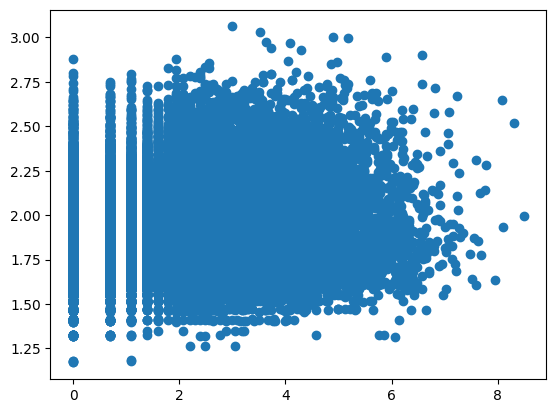

In [ ]:
import numpy as np
model3 = ols("(np.log(Duration) ~ np.log(frp) + np.log(bright_ti4))", firstDayWildfires).fit()
# plt.scatter(np.log(firstDayWildfires.frp), np.log(firstDayWildfires.Duration))
# plt.plot(np.log(firstDayWildfires.frp), (model3.predict(firstDayWildfires)))
plt.scatter(np.log(firstDayWildfires.Duration), (model3.predict(firstDayWildfires)))

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Duration)   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     450.0
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          9.43e-194
Time:                        19:42:05   Log-Likelihood:                -65642.
No. Observations:               35888   AIC:                         1.313e+05
Df Residuals:                   35885   BIC:                         1.313e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.3289      1.192      2.792      0.005       0.992       5.666
np.log(frp)            0.2106      0.011     18.917      0.000       0.189       0.232
np.log(bright_ti4)    -0.2922      0.208     -1.406      0.160      -0.700       0.115
==============================================================================
Omnibus:                     1714.211   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1881.985
Skew:                           0.543   Prob(JB):                         0.00
Kurtosis:                       2.718   Cond. No.                         926.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

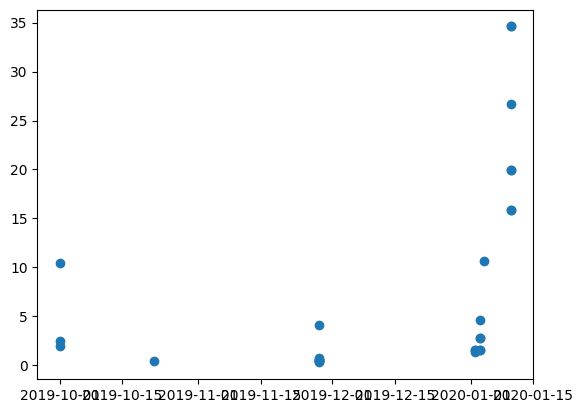

In [ ]:
plt.scatter(coordWildfires.acq_date, coordWildfires.frp)
plt.show()

In [ ]:
# model1 = ols("(frp ~ acq_date  + I(acq_date**2))", coordWildfires).fit()
# plt.scatter(coordWildfires.acq_date, coordWildfires.frp)
# plt.plot(coordWildfires.acq_date, model1.predict(coordWildfires))